<a href="https://colab.research.google.com/github/arssite/Datalysis/blob/main/carPrize_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libaries

In [1]:
import pandas as pd
import numpy as np

# Importing Data

In [2]:
data=pd.read_pickle('/content/CarPricesData (1).pkl')

In [6]:
#from google.colab import files
#upload=files.upload()

In [13]:
data.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [14]:
data.describe()
#seven Inputs

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,56.027178,68571.782578,1071.659930,101.491986,0.674564,1566.735192,4.032753,10720.915679
std,18.532943,37491.094553,47.688509,14.981408,0.468701,186.767122,0.952667,3608.732978
min,1.000000,1.000000,1000.000000,69.000000,0.000000,1300.000000,2.000000,4350.000000
25%,44.000000,43000.000000,1040.000000,90.000000,0.000000,1400.000000,3.000000,8450.000000
50%,61.000000,63451.000000,1070.000000,110.000000,1.000000,1600.000000,4.000000,9900.000000
75%,70.000000,87041.500000,1085.000000,110.000000,1.000000,1600.000000,5.000000,11950.000000
max,80.000000,243000.000000,1320.000000,192.000000,1.000000,2000.000000,5.000000,32500.000000


# **PreProcessing**
# Spliting Data Into Test & Train

~ dividing into Independent And Non-Independent Data

In [30]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']


In [31]:
X=data[Predictors].values
y=data[TargetVariable].values

In [47]:
 ### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()


In [48]:
PredScalerFit=PredScaler.fit(X)
TargetScalerFit=TargetScaler.fit(y)
# Storing the fit object for later reference

In [49]:
X=PredScalerFit.transform(X)
Y=TargetScalerFit.transform(y)
# Generating the standardized values of X and y

In [50]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [51]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


# **model Creation** ANN Model

In [40]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

In [41]:
# create ANN model
model = Sequential()

In [42]:
# Defining the Input layer and FIRST hidden layer
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))

In [43]:
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

In [44]:
# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

In [45]:
#Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [58]:
# Fitting the ANN to the Training set
#verbose=1 inclues progress bar and one line epoch
#verbose=0 means silent
#batchsize= specifies how many rows will be passed to the Network in one go after which the SSE calculation will begin and the neural network will start adjusting its weights based on the errors.
model.fit(X_train, Y_train ,batch_size = 20, epochs = 1000, verbose=1)

Epoch 1/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0930
Epoch 2/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0932
Epoch 3/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0930
Epoch 4/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0931
Epoch 5/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0937
Epoch 6/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0929
Epoch 7/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0928
Epoch 8/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0935
Epoch 9/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0935
Epoch 10/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0933
Epoch 11/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0932
Epoch 12/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0931
Epoch 13/1000
51/51 [====

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 40        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Finding the best values for batch_size and epoch is very important as it directly affects the model performance. Bad values can lead to overfitting or underfitting. I am showing two approaches for tuning the parameters of the ANN. Apart from epoch and batch_size, you can also choose to tune the optimal number of neurons, the optimal number of layers, etc.
# Hyperparameter tuning of ANN

1.Manualgrid

In [71]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):

    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20,30]
    epoch_list  =   [5, 10, 50, 100,110]

    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)

            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


In [ ]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, Y_train, X_test, Y_test)

14/14 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 33.381467602667215


<ipython-input-71-7df3e023a14a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 43.27802363626739


<ipython-input-71-7df3e023a14a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 1ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 36.45899418786129


<ipython-input-71-7df3e023a14a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 42.22909716172585


<ipython-input-71-7df3e023a14a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
5 Parameters: batch_size: 5 - epochs: 110 Accuracy: 48.65091136069861


<ipython-input-71-7df3e023a14a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 5 Accuracy: 45.48035401353228


<ipython-input-71-7df3e023a14a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 1ms/step
7 Parameters: batch_size: 10 - epochs: 10 Accuracy: 43.621486536449005


<ipython-input-71-7df3e023a14a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 50 Accuracy: 58.47286234189933


<ipython-input-71-7df3e023a14a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
9 Parameters: batch_size: 10 - epochs: 100 Accuracy: 63.926394281450634


<ipython-input-71-7df3e023a14a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


<Axes: xlabel='Parameters'>

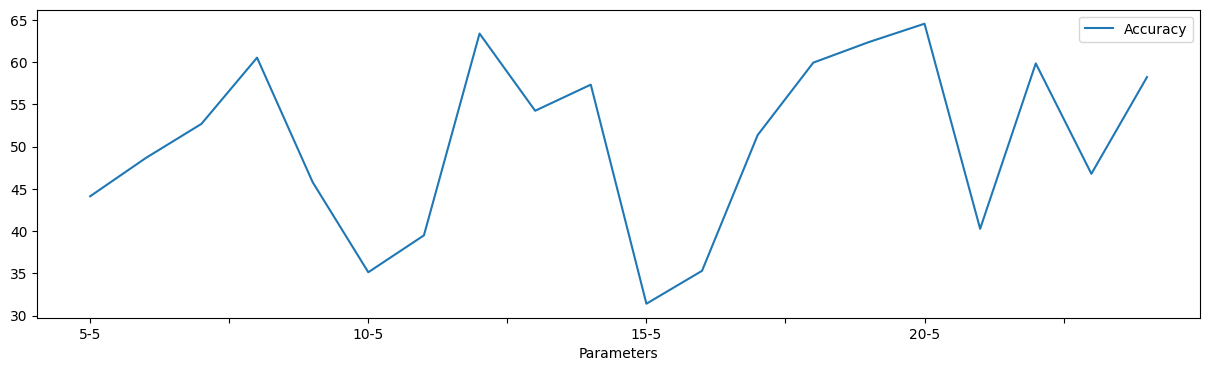

In [64]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

2. Grid Search Cross Validation

In [67]:
# Function to generate Deep ANN model
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense

    model = Sequential()
    model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel,
                         param_grid=Parameter_Trials,
                         scoring=custom_Scoring,
                         cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_

ModuleNotFoundError: No module named 'keras.wrappers'

Training

In [65]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

14/14 [==============================] - 0s 2ms/step


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9950.304688
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,10034.445312
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,9235.415039
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9173.455078
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8893.763672


In [66]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 90.72578892657882


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice,APE
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9950.304688,0.003062
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,10034.445312,25.509010
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,9235.415039,23.138867
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9173.455078,7.804472
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8893.763672,0.628339


In [70]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 30, epochs = 10, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(Y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

14/14 [==============================] - 0s 1ms/step


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9774.193359
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,9913.000977
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8964.809570
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9016.316406
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8733.726562


In [69]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 90.89587350466296


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice,APE
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9805.813477,1.449111
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,9977.549805,24.797371
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8956.398438,19.418646
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9056.185547,8.983060
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8812.558594,1.535658
